# Artificial Neural Network Fundamentals

* ANN: الجوريزم بيحاكي دماغ الانسان بيتعلم من البيانات، زي اللي بيتعلمها الدماغ البشري. بتدريب الشبكة على كمية كبيرة من البيانات، تقدر تتعلم حل مشاكل مختلفة.

# Comparing AI and traditional machine learning

# Learning about the artificial neural network building blocks

# Implementing feedforward propagation

# Calculating the hidden layer unit values

# Applying the activation function

# Calculating the output layer values

# Calculating loss values
* Categorical variable prediction
* Continuous variable prediction

# Feedforward propagation in code

* A high-level strategy of coding feedforward propagation is:

    1. Perform a sum product at each neuron.
    2. Compute activation.
    3. Repeat the first two steps at each neuron until the output layer.
    4. Compute the loss by comparing the prediction with the actual output.

In [1]:
import numpy as np

def sigmoid(dot_value):
    activate_value = 1 / (1 + np.exp(-dot_value)) 
    return activate_value  

def mean_squared_error(pred_value, true_value):
    mse = np.mean(np.square(pred_value - true_value))
    return mse

def feed_forward(inputs,outputs, weights):
    # First hidden layer
    first_hidden_layer = sigmoid(np.dot(inputs, weights[0]) + weights[1])
    
    # Second hidden layer and output layer
    output_layer = np.dot(first_hidden_layer, weights[2]) + weights[3]

    # Calculate the mean squared error
    mean_squared_error_value = mean_squared_error(output_layer,outputs)
    return mean_squared_error_value

# Activation functions in code

In [2]:
def sigmoid(dot_value):
    activate_value = 1 / (1 + np.exp(-dot_value)) 
    return activate_value

def tanh(dot_value):
    activate_value = (np.exp(dot_value)-np.exp(-dot_value))/(np.exp(dot_value)+np.exp(-dot_value))
    return activate_value

def relu(dot_value):
    activate_value =np.where(dot_value>0,dot_value,0)
    return activate_value

def linear(dot_value):
    return dot_value

def softmax(dot_value):
    activate_value = np.exp(dot_value)/np.sum(np.exp(dot_value))
    return activate_value

# Loss functions in code

In [3]:
def mean_squared_error(pred_value, true_value):
    mse = np.mean(np.square(pred_value - true_value))
    return mse

def mean_absolute_error(pred_value, true_value):
    mae = np.mean(np.abs(pred_value - true_value))
    return mae

def binary_cross_entropy(pred_value, true_value):
    bce = -np.mean(true_value*np.log(pred_value)+ (1-true_value)*np.log(1-pred_value))
    return bce

def categorical_cross_entropy(pred_value, true_value):
    cce = -np.mean(np.log(pred_value[np.arange(len(true_value)),true_value]))

# Gradient descent in code

In [4]:
from copy import deepcopy

def update_weights(inputs, outputs, weights, learning_rate):
    
    # Deep copy of the original weights
    original_weights = deepcopy(weights)

    # Create temporary weights for updates
    temp_weights = deepcopy(weights)

    # Create a copy to store the updated weights
    updated_weights = deepcopy(weights)

    # Calculate the original loss
    original_loss = feed_forward(inputs, outputs, original_weights)

    # Loop through layers and weights
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            
            # Create a deep copy of the weights for this iteration
            temp_weights = deepcopy(weights)
            
            # Add a small perturbation to the weight
            temp_weights[i][index] += 0.0001

            # Calculate the loss with the perturbed weight
            _loss_plus = feed_forward(inputs, outputs, temp_weights)

            # Calculate the gradient
            grad = (_loss_plus - original_loss) / 0.0001

            # Update the weight using gradient descent
            updated_weights[i][index] -= grad * learning_rate

    # Return the updated weights and the original loss
    return updated_weights, original_loss


In [5]:
x = np.array([1, 1])
y = np.array([0])

weights = [
    np.array([[0.8, 0.4, 0.3], [0.2, 0.9, 0.5]]),
    np.array([0.1]),
    np.array([0.3, 0.5, 0.9]),
    np.array([0.3])
]

In [6]:
update_weights(x,y,weights=weights,learning_rate=0.0001)

([array([[0.79998239, 0.39997515, 0.29994207],
         [0.19998239, 0.89997515, 0.49994207]]),
  array([0.09989962]),
  array([0.29976501, 0.49974875, 0.89977732]),
  array([0.29968679])],
 2.4524328233009114)

# Implementing backpropagation using the chain rule

In [7]:
def line():
    print('='*80)

x = np.array([[1,1]]); y = np.array([[0]])  
W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T, 
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32), 
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T, 
    np.array([-0.5516], dtype=np.float32)
]
line()
print('Loss:'.upper())
print(feed_forward(x,y,W))
line()
print('Weights:'.upper())
[print(w) for w in W]
line()
print('Updated Weights:'.upper())
for epx in range(1):
    updated_weights = update_weights(x,y,W,1)
[print(w) for w in updated_weights];

LOSS:
0.33455008989960927
WEIGHTS:
[[-0.0053 -0.582  -0.2723]
 [ 0.3793 -0.5204  0.1896]]
[-0.014   0.5607 -0.0628]
[[ 0.1528]
 [-0.1745]
 [-0.1135]]
[-0.5516]
UPDATED WEIGHTS:
[array([[ 0.03748801, -0.62894595, -0.30494714],
       [ 0.42208242, -0.5673459 ,  0.156948  ]], dtype=float32), array([ 0.02878801,  0.51375407, -0.09545201], dtype=float32), array([[0.8341824 ],
       [0.25095794],
       [0.4228859 ]], dtype=float32), array([0.60529804], dtype=float32)]
0.33455008989960927


### Chain Rule
* Calculate the updated weight value using Chain rule

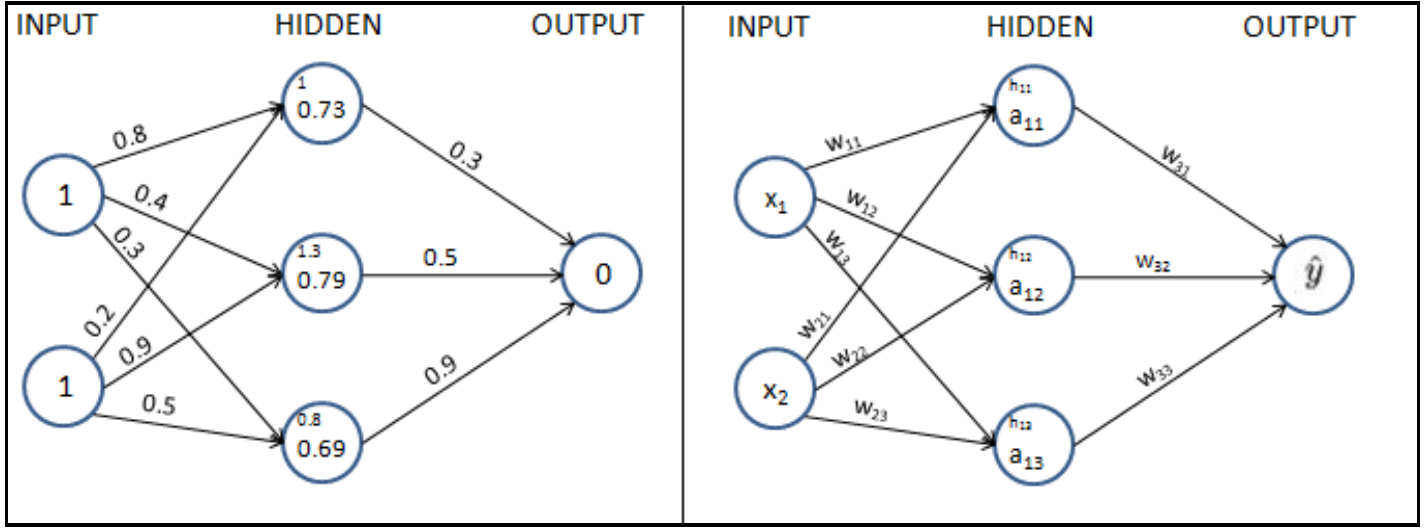

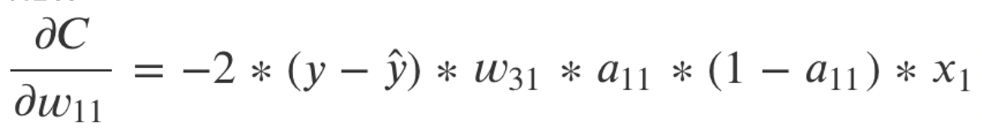

In [8]:
pre_hidden = np.dot(x,W[0])+ W[1]
hidden = sigmoid(pre_hidden)
predicted_value = np.dot(hidden, W[2]) + W[3]

In [9]:
tmp = W[0][0][0] - (-2*(0-(predicted_value[0][0]))*(W[2][0][0])*hidden[0,0]*(1-hidden[0,0])*x[0][0])
print(tmp, updated_weights[0][0][0])

0.03748860333147175 [ 0.03748801 -0.62894595 -0.30494714]


In [10]:
tmp = W[0][0][1] - (-2*(0-(predicted_value[0][0]))*(W[2][1][0])*hidden[0,1]*(1-hidden[0,1])*x[0][0])
print(tmp, updated_weights[0][0][1])

-0.6289373468565382 [ 0.42208242 -0.5673459   0.156948  ]


In [11]:
tmp = W[0][0][2] - (-2*(0-(predicted_value[0][0]))*(W[2][2][0])*hidden[0,2]*(1-hidden[0,2])*x[0][0])
print(tmp, updated_weights[0][0][0])

-0.304951263947996 [ 0.03748801 -0.62894595 -0.30494714]


In [12]:
tmp = W[0][1][0] - (-2*(0-(predicted_value[0][0]))*(W[2][0][0])*hidden[0,0]*(1-hidden[0,0])*x[0][1])
print(tmp, updated_weights[0][1][0])

0.42208860145914084 0.028788012


In [13]:
tmp = W[0][1][1] - (-2*(0-(predicted_value[0][0]))*(W[2][1][0])*hidden[0,1]*(1-hidden[0,1])*x[0][1])
print(tmp, updated_weights[0][1][1])

-0.5673373173880019 0.51375407


In [14]:
tmp = W[0][1][2] - (-2*(0-(predicted_value[0][0]))*(W[2][2][0])*hidden[0,2]*(1-hidden[0,2])*x[0][1])
print(tmp, updated_weights[0][1][2])

0.15694874675699821 -0.09545201


In [27]:
tmp = W[1][0] - (-2*(0-(predicted_value[0][0]))*hidden[0,0]*(1-hidden[0,0])*W[2][0][0])
print(tmp, updated_weights[0][1][0])

0.028788602743620932 0.028788012


In [48]:
tmp = W[1][1] - (-2*(0-(predicted_value[0][0]))*hidden[0,1]*(1-hidden[0,1])*W[2][1][0])
print(tmp, updated_weights[0][1][1])

0.5137626696420274 0.51375407


In [47]:
tmp = W[1][2] - (-2*(0-(predicted_value[0][0]))*hidden[0,2]*(1-hidden[0,2])*W[2][2][0])
print(tmp, updated_weights[0][1][2])

-0.0954512566166247 -0.09545201


In [46]:
tmp = W[2][0][0]-(-2*(0-(predicted_value[0][0]))*hidden[0][0])
print(tmp, updated_weights[0][2][0][0])

0.8342055621416937 0.8341824


In [45]:
tmp = W[2][1][0]-(-2*(0-(predicted_value[0][0]))*hidden[0][1])
print(tmp, updated_weights[0][2][1][0])

0.2509642654210383 0.25095794


In [44]:
tmp = W[2][2][0]-(-2*(0-(predicted_value[0][0]))*hidden[0][2])
print(tmp, updated_weights[0][2][2][0])

0.422898309408289 0.4228859


In [41]:
tmp = W[3][0]-(-2*(0-(predicted_value[0][0])))
print(tmp, updated_weights[0][3][0])

0.6052061234525776 0.60529804


# Putting feedforward propagation and backpropagation together

# Understanding the impact of the learning rate